In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

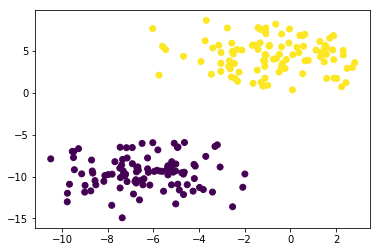

In [625]:
X,Y=make_blobs(n_samples=200,centers=2,n_features=2,cluster_std=2,random_state=11)
Y[Y==0]=-1
plt.scatter(X[:,0],X[:,1],c=Y)
Train_x,Val_x,Train_y,Val_y=train_test_split(X,Y,test_size=0.2)

$X=[x_1,x_2,...,x_N]^T \in \mathbb{R}^{N*d},Y=[y_1,y_2,...,y_N]^T \in \mathbb{R}^{N*1}$

$L(\omega,b)=-\sum\limits_{x_i \in M} y_i(\omega \cdot x_i+b)$  

$\nabla_\omega L(\omega,b)=-\sum\limits_{x_i \in M}y_ix_i$

$\nabla_b L(\omega,b)=-\sum\limits_{x_i\in M}y_i$

In [626]:
class Perception():
    def __init__(self,N):
        np.random.seed(11)
        self.W=np.random.random(N)
        self.b=np.random.random(1)
        self.lr=0.01
        
    def judge(self,x,y):
        ans=y*(np.dot(x,self.W)+self.b)
        if ans>0:
            return 1
        return -1
    
    def fit(self,X,Y):
        while 1:
            op=0
            for x,y in zip(X,Y):
                if self.judge(x,y)==-1:
                    op=1
                    self.W=self.W+self.lr*y*x
                    self.b=self.b+self.lr*y
            if op==0:
                break
                
    def predict(self,X):
        Y=np.dot(X,self.W)+self.b
        Y[Y>0],Y[Y<0]=1,-1
        return Y

In [627]:
def show(clf,X,Y):
    plt.scatter(X[:,0],X[:,1],c=Y)
    x=np.arange(-10,5).reshape(-1,1)
    y=((-clf.W[0]/clf.W[1])*x+(-clf.b/clf.W[1])).reshape(-1,1)
    plt.plot(x,y)

Befor Train,Train acc: 94.375000%
After Train,Train acc: 100.000000%


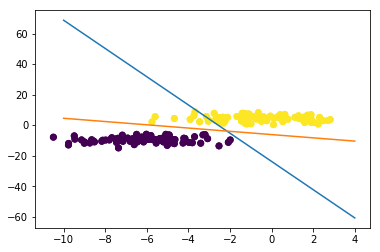

In [628]:
n_feature=X.shape[1]
clf=Perception(n_feature)
Y=clf.predict(Train_x)
print("Befor Train,Train acc: %lf%%"%(sum(Y==Train_y)/len(Train_x)*100))
show(clf,Train_x,Train_y)

clf.fit(Train_x,Train_y)

Y=clf.predict(Train_x)
print("After Train,Train acc: %lf%%"%(sum(Y==Train_y)/len(Train_x)*100))
show(clf,Train_x,Train_y)

In [629]:
Y=clf.predict(Val_x)
print("Val acc %lf%%"%(sum(Y==Val_y)/len(Val_x)*100))

Val acc 100.000000%
